## Labeling Connected Components

Import libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.signal import convolve2d

Load and display image

In [2]:
def load_image(image_path, threshold=127):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    _, binary = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)
    return binary

def show_image(img, title="Image"):
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()


Implement dilation operation in this section


In [3]:
def dilation(binary_image, struct_elem):
##################################################
    dilated = convolve2d(binary_image, struct_elem, mode='same')
    dilated[dilated > 0] = 255
    return dilated
##################################################



![connected _components_Extraction](./connected%20_components_Extraction.jpeg)


Based on the morphological relation shown in the image above, complete the function `morphological_connected_component` to identify and label connected components.

`labeled` is an array with the same size as the input image, where each pixel holds the label of the connected component it belongs to.


In [12]:
def morphological_connected_component(binary_image, structure=None):
##################################################
    def bfs(vertex, label, labeled):
        new_component = np.zeros_like(binary_image)
        new_component[vertex] = 255
        component = np.zeros_like(binary_image)
        while(not np.array_equal(component, new_component)):
            component = new_component.copy()
            dilated = dilation(component, structure)
            inersection = (binary_image == dilated) & (binary_image == 255) 
            new_component[inersection] = 255
        labeled[component == 255] = label
    
    labeled = np.zeros_like(binary_image, np.uint32)
    label = 1
    for i in range(binary_image.shape[0]):
        for j in range(binary_image.shape[1]):
            if (not labeled[i, j]) and (binary_image[i, j]):
                bfs((i, j), label, labeled)
                label += 1

    return labeled
##################################################


In [6]:
def display_labeled_components(labeled_img):
    max_label = labeled_img.max()
    labeled_color = np.zeros((*labeled_img.shape, 3), dtype=np.uint8)

    for label in range(1, max_label + 1):
        mask = labeled_img == label
        color = np.random.randint(0, 255, size=3)
        labeled_color[mask] = color

    plt.imshow(labeled_color)
    plt.title("Labeled Components")
    plt.axis('off')
    plt.show()


### In the image "Connected_Components", there are 10 connected components. Complete the code below to label them using morphological operations.


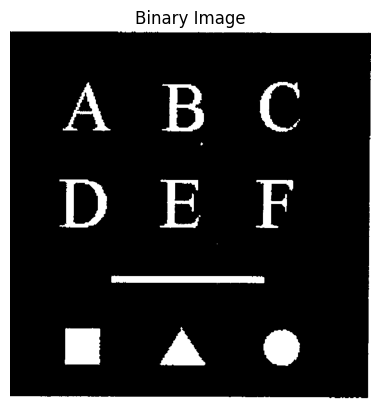

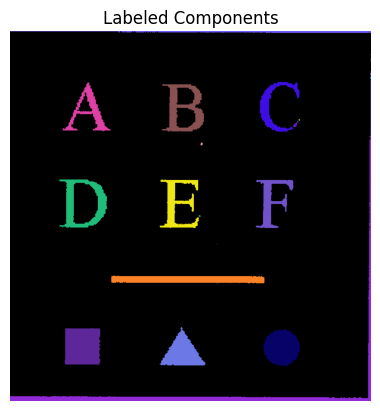

In [13]:
path = "Connected_Components.png"

binary_img = load_image(path)
show_image(binary_img, "Binary Image")

structure = np.array([[1, 1, 1],
                      [1, 1, 1],
                      [1, 1, 1]])
labeled = morphological_connected_component(binary_img, structure)
display_labeled_components(labeled)


## Skeleton Extraction

Import libraries

In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

Load and display image

In [45]:
def load_and_binarize_image(image_path, threshold=127):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
   
    _, binary = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)
    return (binary // 255).astype(np.uint8)

def show_image(img, title="Image"):
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()


Implement erosion operation in this section


In [53]:
def erosion(binary_image, struct_elem):
##################################################
    eroded = convolve2d(binary_image, np.rot90(struct_elem, k=2), mode='same')
    eroded[eroded != struct_elem.sum()] = 0
    eroded[eroded == struct_elem.sum()] = 1
    return eroded
##################################################

Implement dilation operation in this section


In [47]:
def dilation(binary_image, struct_elem):
##################################################
    dilated = convolve2d(binary_image, struct_elem, mode='same')
    dilated[dilated > 0] = 1
    return dilated
##################################################

Implement opening operation in this section


In [48]:
def opening(binary_image, struct_elem):
##################################################
    eroded = erosion(binary_image, struct_elem)
    opened = dilation(eroded, struct_elem)
    return opened
##################################################

<img src="./skeletion_relation.jpeg" style="width:600px"/>


Based on the morphological operations illustrated in the image above, complete the function `morphological_skeleton` to compute the skeleton of a binary image using iterative morphological erosion and opening.

In [49]:
def morphological_skeleton(binary_image, struct_elem=None):
##################################################
    A = binary_image.copy()
    B = struct_elem
    skeleton = np.zeros_like(binary_image)
    while(np.any(A)):
        opened = opening(A, B)
        condition = (A == 1) & (opened == 0)
        skeleton[condition] = 1
        A = erosion(A, B)

    return skeleton
##################################################

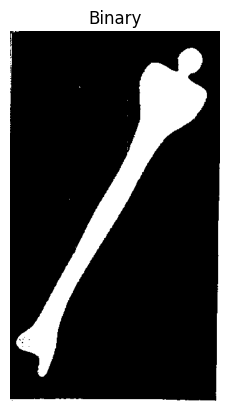

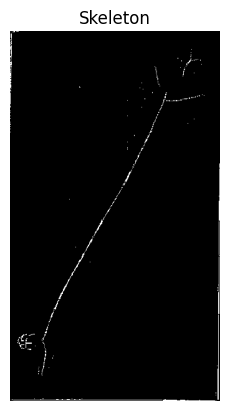

In [54]:
path = "skeleton.jpeg"
binary = load_and_binarize_image(path)
plt.imshow(binary, cmap='gray'); plt.title("Binary"); plt.axis('off'); plt.show()

structure = np.array([[1, 1, 1],
                      [1, 1, 1],
                      [1, 1, 1]])
skel = morphological_skeleton(binary, structure)
plt.imshow(skel, cmap='gray'); plt.title("Skeleton"); plt.axis('off'); plt.show()